In [19]:
#Linear Regression


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
df = pd.read_csv("advertising.csv")
df.shape


(200, 4)

In [5]:
X = df[["TV"]]
y = df[["sales"]]

In [7]:
reg_model = LinearRegression().fit(X, y)
reg_model.intercept_[0]


7.032593549127695

In [8]:
reg_model.coef_[0][0]

0.04753664043301975

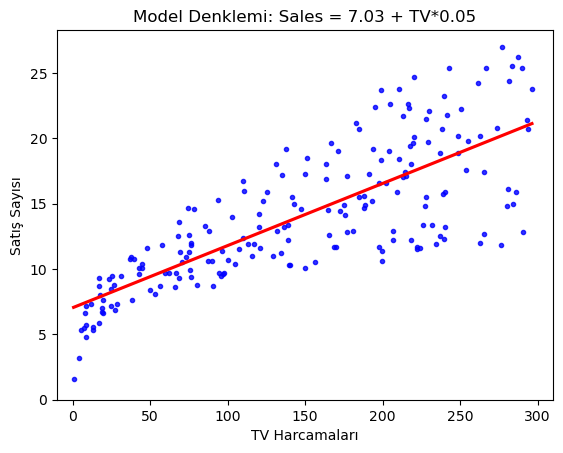

In [9]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


In [10]:
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [13]:
y.mean()

sales   14.02
dtype: float64

In [14]:
y.std()

sales   5.22
dtype: float64

In [15]:
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [16]:
mean_absolute_error(y, y_pred)

2.549806038927486

In [17]:
reg_model.score(X, y)

0.611875050850071

# Multiple Linear Regression


In [22]:
df = pd.read_csv("advertising.csv")
X = df.drop('sales', axis=1)
y = df[["sales"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

In [24]:
reg_model.intercept_

array([2.90794702])

In [25]:
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [26]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

C:\Users\tr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [28]:
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [29]:
reg_model.score(X_train, y_train)

0.8959372632325174

In [30]:
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [32]:
reg_model.score(X_test, y_test)

0.8927605914615384

In [33]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051797